In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
patient = pd.read_excel("Patient List.xlsx")

In [3]:
patient.dtypes

Patient ID                           int64
Responsible Party ID                 int64
Patient Zip                         object
Active/Inactive                     object
Birth Year                           int64
Patient Gender                      object
Patient Home Office ID               int64
Patient Home Office Name            object
Patient First Visit Date    datetime64[ns]
Patient Last Visit Date     datetime64[ns]
Patient Type                        object
Responsible Party Type              object
dtype: object

In [4]:
#Percentage of Missing Value
percent_missing = ((patient.isnull().sum()/patient.shape[0])*100)
num_values = len(patient) - patient.isnull().sum()
missing_df = pd.DataFrame({'Features': patient.columns,'Number of Values':num_values,
                           'Missing Percentage':percent_missing})
missing_df


,Features,Number of Values,Missing Percentage
Patient ID,Patient ID,427558,0.000000
Responsible Party ID,Responsible Party ID,427558,0.000000
Patient Zip,Patient Zip,427312,0.057536
Active/Inactive,Active/Inactive,427558,0.000000
Birth Year,Birth Year,427558,0.000000
Patient Gender,Patient Gender,427444,0.026663
Patient Home Office ID,Patient Home Office ID,427558,0.000000
Patient Home Office Name,Patient Home Office Name,427558,0.000000
Patient First Visit Date,Patient First Visit Date,427549,0.002105
Patient Last Visit Date,Patient Last Visit Date,427558,0.000000


In [5]:
patient["Patient Gender"] = patient["Patient Gender"].replace(' ', np.nan)
patient['Patient Zip'] = patient['Patient Zip'].str[:5]
patient['Patient Zip'] = pd.to_numeric(patient['Patient Zip'],errors='ignore',downcast='signed')
patient['Patient Zip'] = patient['Patient Zip'].fillna('00000').astype('str')

patient["Patient Gender"] = patient["Patient Gender"].fillna("U")
patient["Patient Type"] = patient["Patient Type"].fillna("Unknown")
patient["Responsible Party Type"] = patient["Responsible Party Type"].fillna("Unknown")
patient = patient.dropna()


In [6]:
patient['Duration'] = patient['Patient Last Visit Date']- patient['Patient First Visit Date']
patient['Duration'] = (patient['Duration']).dt.days/365

In [7]:
mapping1 = {'Active': 1, 'Inactive': 0}
mapping2 = {'F': 1, 'M': 2, 'U': 3}
patient = patient.replace({'Active/Inactive': mapping1, "Patient Gender": mapping2})

In [8]:
patient[["Patient ID", "Responsible Party ID", "Birth Year",
        "Active/Inactive", "Patient Gender", "Patient Home Office ID"]] = patient[["Patient ID", "Responsible Party ID", "Birth Year",
        "Active/Inactive", "Patient Gender", "Patient Home Office ID"]].apply(lambda x: x.astype('float64'))

In [9]:
patient.columns

Index(['Patient ID', 'Responsible Party ID', 'Patient Zip', 'Active/Inactive',
       'Birth Year', 'Patient Gender', 'Patient Home Office ID',
       'Patient Home Office Name', 'Patient First Visit Date',
       'Patient Last Visit Date', 'Patient Type', 'Responsible Party Type',
       'Duration'],
      dtype='object')

In [10]:
patient.describe()

,Patient ID,Responsible Party ID,Active/Inactive,Birth Year,Patient Gender,Patient Home Office ID,Duration
count,4.275490e+05,4.275490e+05,427549.000000,427549.000000,427549.000000,427549.000000,427549.000000
mean,7.615873e+07,7.585377e+07,0.944505,1978.605528,1.462983,148.556687,5.395037
std,3.400055e+07,3.420703e+07,0.228945,21.867779,0.501808,29.552780,6.904551
min,1.000011e+06,1.000009e+06,0.000000,1900.000000,1.000000,101.000000,-0.695890
25%,5.502989e+07,5.501764e+07,1.000000,1962.000000,1.000000,122.000000,0.197260
50%,9.007040e+07,9.005877e+07,1.000000,1981.000000,1.000000,147.000000,2.717808
75%,9.019157e+07,9.017438e+07,1.000000,1995.000000,2.000000,176.000000,7.734247
max,1.860138e+08,1.860138e+08,1.000000,2022.000000,3.000000,199.000000,121.421918


In [11]:
patient.head()

,Patient ID,Responsible Party ID,Patient Zip,Active/Inactive,Birth Year,Patient Gender,Patient Home Office ID,Patient Home Office Name,Patient First Visit Date,Patient Last Visit Date,Patient Type,Responsible Party Type,Duration
0,1000011.0,1000009.0,03223,1.0,1957.0,1.0,101.0,Brookline,1994-04-20,2021-08-16,Unknown,IN,27.342466
1,1000015.0,1000012.0,01773,1.0,1965.0,1.0,101.0,Brookline,1992-05-08,2022-04-23,Unknown,IN,29.978082
2,1000038.0,1000031.0,01880,0.0,1967.0,2.0,118.0,Wakefield,1991-12-19,2021-06-21,Unknown,IN,29.526027
3,1000039.0,1000032.0,02169,1.0,1952.0,1.0,101.0,Brookline,1990-12-05,2019-07-17,Unknown,CO,28.632877
4,1000111.0,1000102.0,02171,1.0,1948.0,1.0,101.0,Brookline,1994-03-14,2022-03-01,Unknown,IN,27.983562


<AxesSubplot:xlabel='Birth Year', ylabel='Count'>

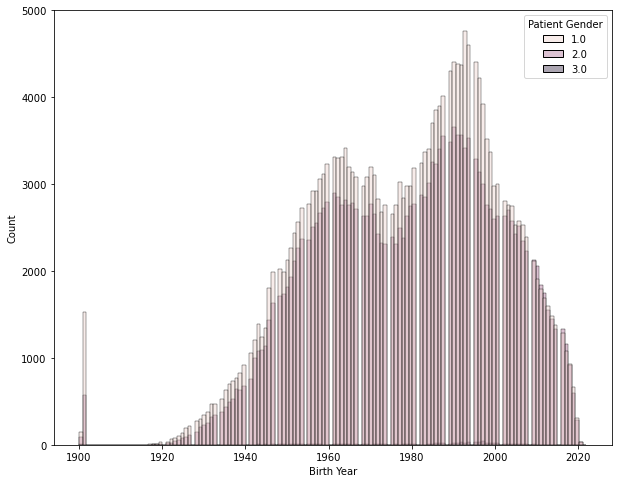

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
sns.histplot(patient,x = 'Birth Year',hue = 'Patient Gender',alpha = 0.4,legend = True)

<AxesSubplot:xlabel='Duration', ylabel='Count'>

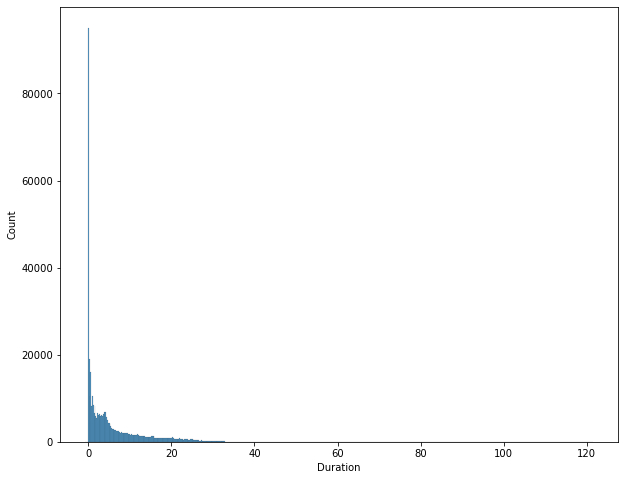

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
sns.histplot(patient['Duration'])

<AxesSubplot:>

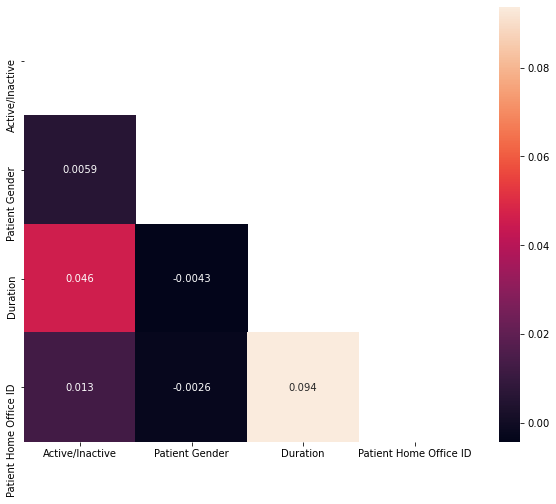

In [14]:
table = patient[['Active/Inactive',
              'Patient Gender',
              'Patient Type', 
              'Responsible Party Type',
              
              'Duration',
              'Patient Zip',
              'Patient Home Office ID']].copy()
f, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(table.corr()))
sns.heatmap(table.corr('pearson'),annot = True,mask=mask)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Active/Inactive', ylabel='count'>

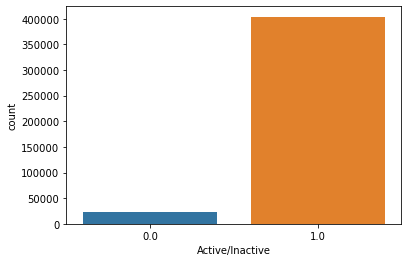

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

## active/inactive
sns.countplot(patient["Active/Inactive"])

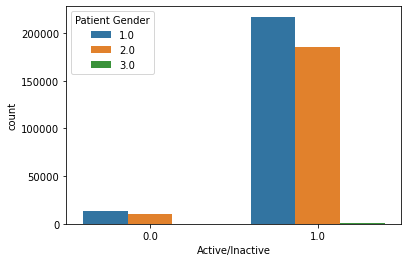

In [16]:
ax = sns.countplot(x= patient["Active/Inactive"], hue= patient["Patient Gender"])

## 1 is female, 2 is male

In [17]:
## statistics for active and incative patient
patient[patient["Active/Inactive"] == 1][["Birth Year", "Duration"]].describe([0.05,0.25,0.50,0.75,0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
Birth Year,403822.0,1978.720622,21.823521,1900.000000,1943.0,1962.000000,1981.0,1996.000000,2011.000000,2022.000000
Duration,403822.0,5.471934,6.954696,-0.019178,0.0,0.208219,2.8,7.903425,21.208219,121.421918


In [18]:
patient[patient["Active/Inactive"] == 0][["Birth Year", "Duration"]].describe([0.05,0.25,0.50,0.75,0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
Birth Year,23727.0,1976.646689,22.518185,1900.00000,1939.0,1959.00000,1980.000000,1994.000000,2011.000000,2020.000000
Duration,23727.0,4.086282,5.833759,-0.69589,0.0,0.09589,1.794521,5.009589,18.390959,108.249315


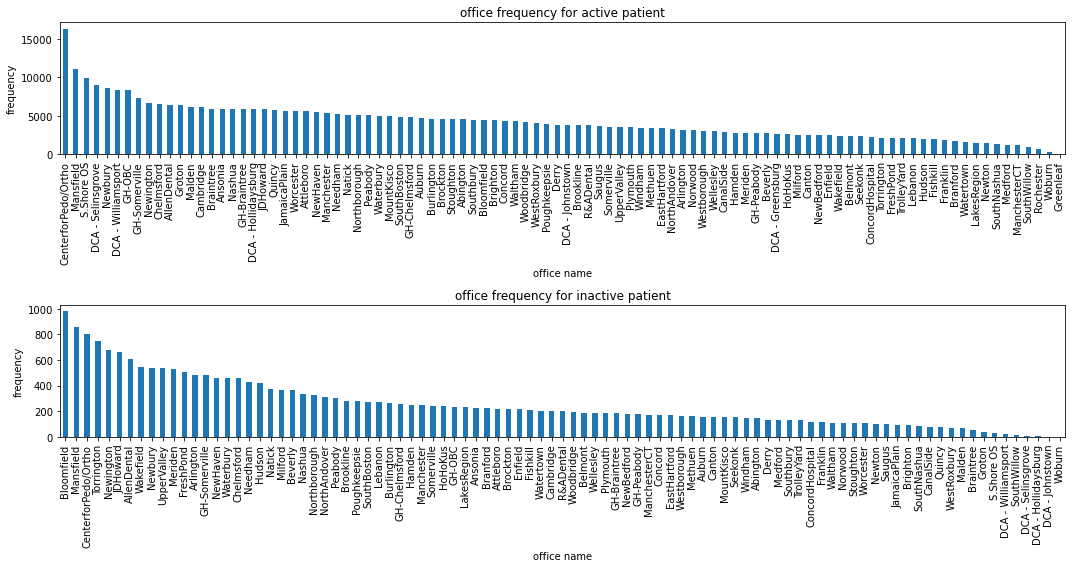

In [19]:
# Patient Home Office frequency 
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(2)
ax1 = patient[patient["Active/Inactive"] == 1]['Patient Home Office Name'].value_counts().plot(ax=ax[0], kind='bar', xlabel='office name', ylabel='frequency')
ax1.set_title("office frequency for active patient")
ax2 = patient[patient["Active/Inactive"] == 0]['Patient Home Office Name'].value_counts().plot(ax=ax[1], kind='bar', xlabel='office name', ylabel='frequency')
ax2.set_title("office frequency for inactive patient")
plt.show()

In [20]:
## active/inactive ratio for all office
## ratio calculated by inactive divided by active

list_ = patient[patient["Active/Inactive"] == 0]['Patient Home Office Name'].value_counts()/patient[patient["Active/Inactive"] == 1]['Patient Home Office Name'].value_counts()
list_ = list_.to_frame(name='ratio')


list_['Rank'] = list_["ratio"].rank(ascending=False)
list_[list_["Rank"] <= 5].sort_values(by=["Rank"])

,ratio,Rank
Torrington,0.344255,1.0
FreshPond,0.239549,2.0
Wakefield,0.225462,3.0
Bloomfield,0.218263,4.0
Hudson,0.207753,5.0


In [21]:
list_ [list_["Rank"] > 88].sort_values(by=["Rank"])

,ratio,Rank
S.Shore OS,0.003209,89.0
DCA - Williamsport,0.003113,90.0
DCA - Hollidaysburg,0.000848,91.0
DCA - Selinsgrove,0.000664,92.0
DCA - Johnstown,0.000260,93.0


<AxesSubplot:xlabel='office name', ylabel='active/inactive ratio'>

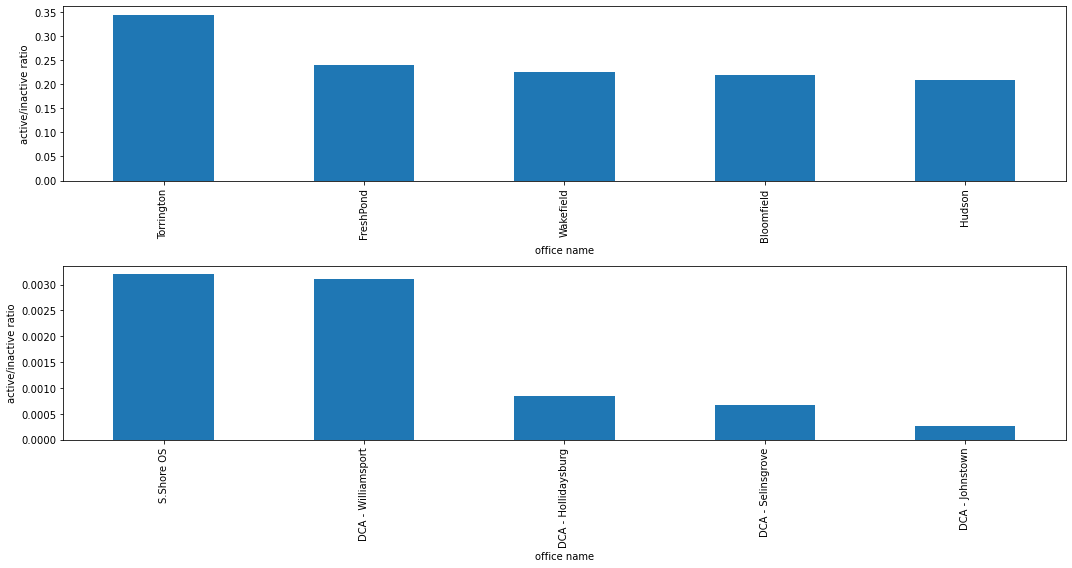

In [34]:
fig, ax = plt.subplots(2)

list_[list_["Rank"] <= 5].sort_values(by=["Rank"])["ratio"].plot(ax=ax[0], kind='bar', xlabel='office name', ylabel='active/inactive ratio')
list_[list_["Rank"] > 88].sort_values(by=["Rank"])["ratio"].plot(ax=ax[1], kind='bar', xlabel='office name', ylabel='active/inactive ratio' )

In [22]:
## patient type

patient[patient["Patient Type"]!= "Unknown"]["Patient Type"].value_counts().idxmax()


'UP'

In [23]:
patient[(patient["Patient Type"]!= "Unknown") &  (patient["Active/Inactive"] == 0)]["Patient Type"].value_counts().index.tolist()[:5]


['UP', 'IA', 'IAUP', 'DCUP', 'DC']

In [24]:
patient[(patient["Patient Type"]!= "Unknown") &  (patient["Active/Inactive"] == 1)]["Patient Type"].value_counts().index.tolist()[:5]


['UP', 'CH', 'OR', 'VC', 'CP']